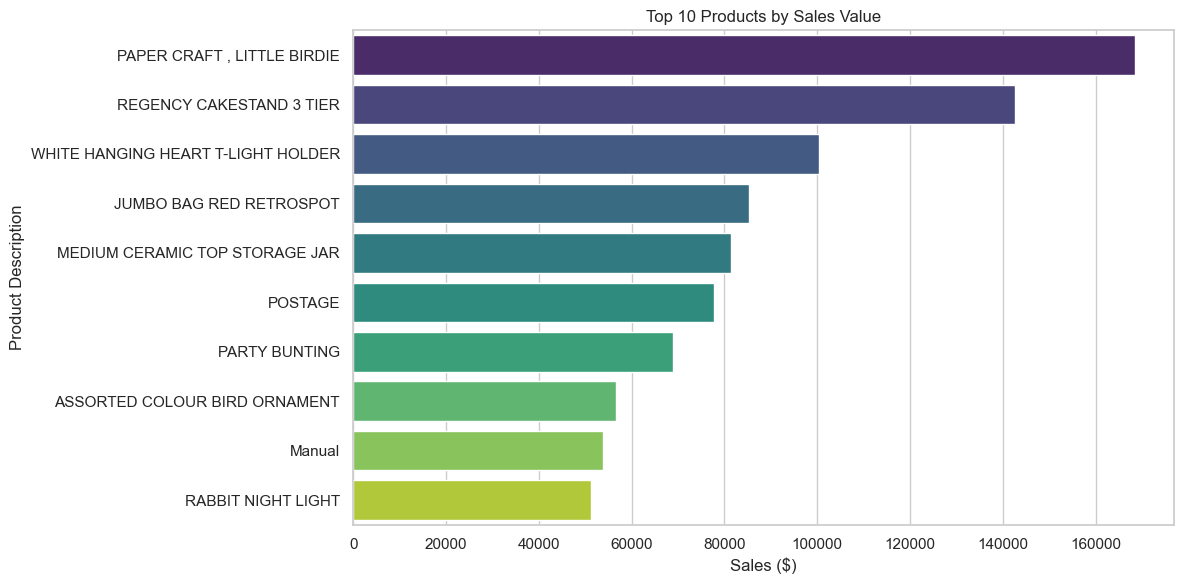

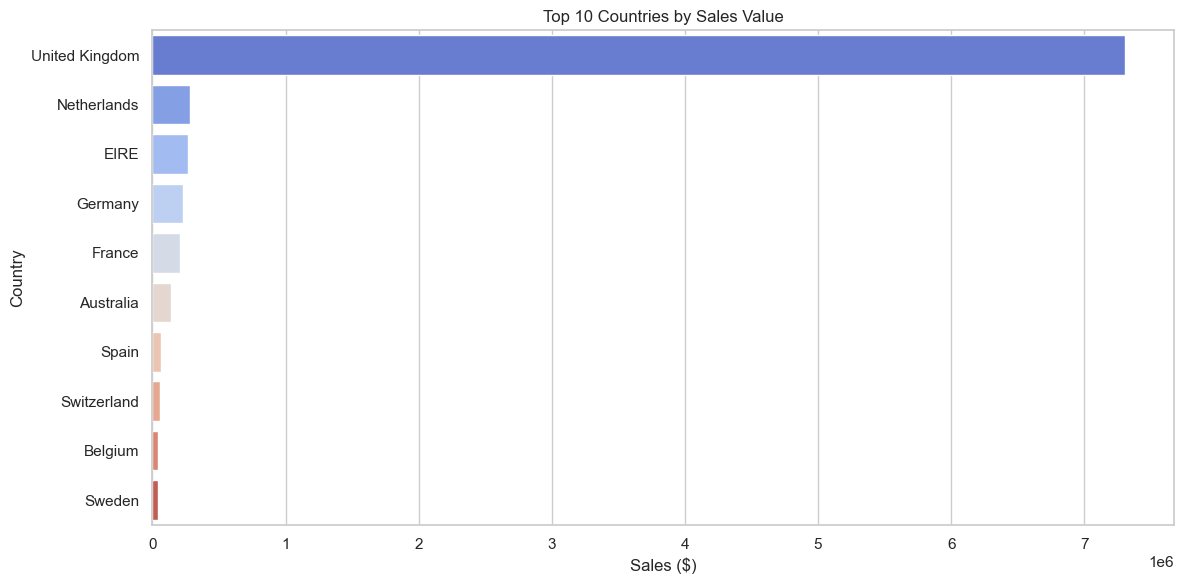

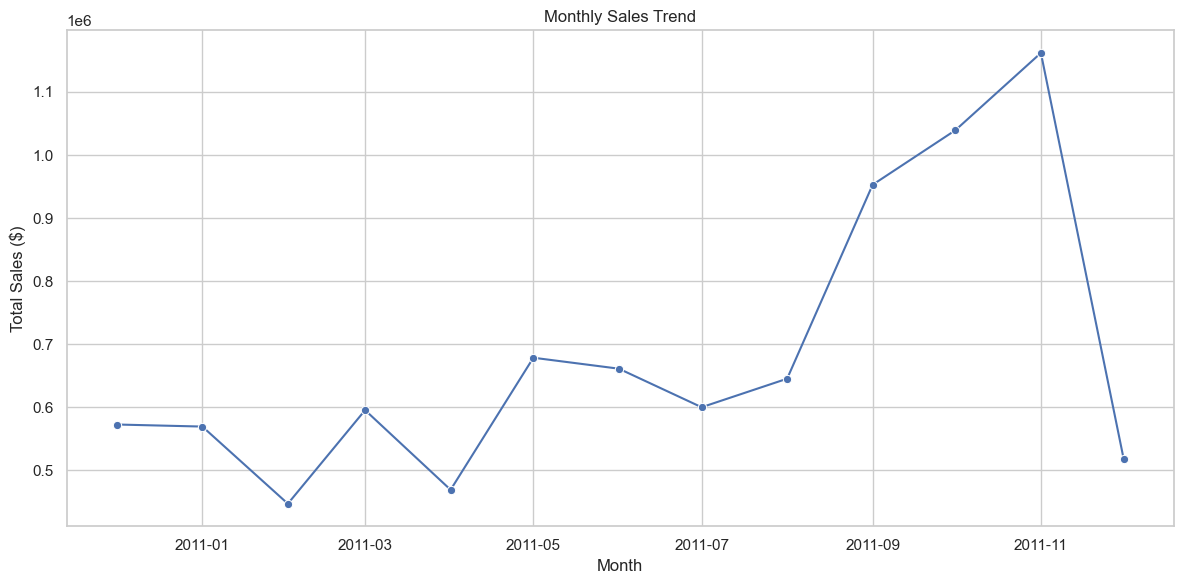

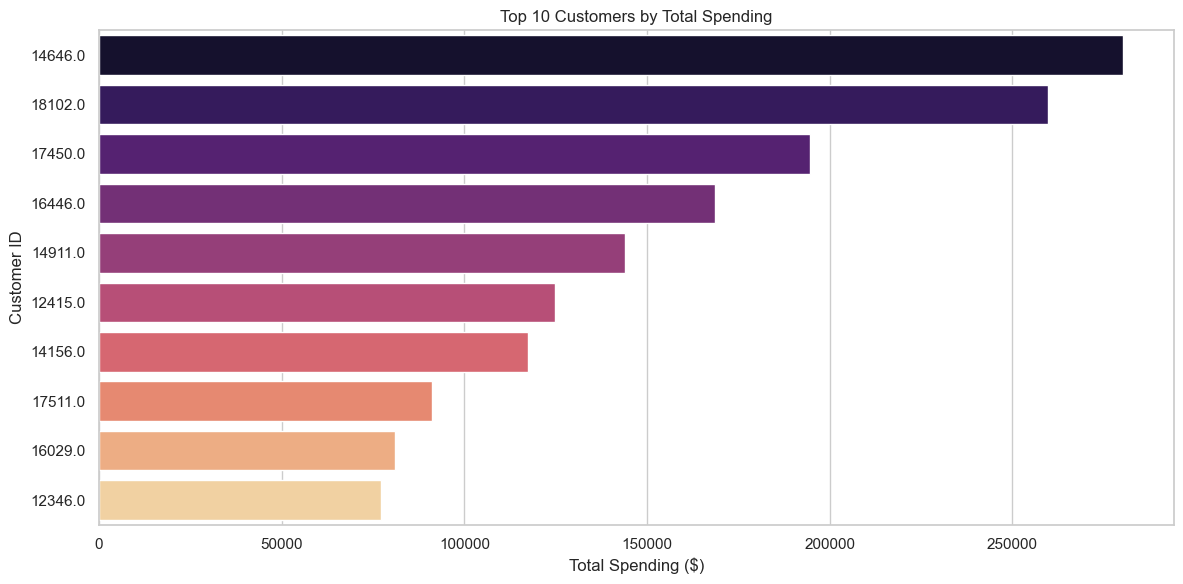


Summary:
- The analysis identifies the best-selling products driving the most revenue.
- Sales are concentrated in specific countries, highlighting potential markets for growth.
- Monthly sales show seasonality and trends useful for inventory and marketing planning.
- Top customers contribute significantly to total revenue, enabling targeted retention strategies.



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Step 1: Load the dataset
# The dataset contains online retail transactions with customer and product info
df = pd.read_excel('Online Retail.xlsx')

# Step 2: Data Cleaning
# Remove rows with missing CustomerID as we need customer info for analysis
df = df.dropna(subset=['CustomerID'])

# Remove negative quantities which represent returns/refunds
df = df[df['Quantity'] > 0]

# Convert InvoiceDate from string to datetime object for time-based analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column 'TotalPrice' = Quantity * UnitPrice for sales value
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 3: Exploratory Data Analysis (EDA)

# 3a) Top 10 products by total sales value
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# 3b) Sales distribution by country
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# 3c) Monthly sales trend over time
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

# 3d) Top 10 customers by total spending
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Step 4: Visualization

# Plot top 10 products by sales
plt.figure()
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales Value")
plt.xlabel("Sales ($)")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

# Plot sales by country (top 10 countries)
plt.figure()
top_countries = sales_by_country.head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries by Sales Value")
plt.xlabel("Sales ($)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot monthly sales trend
plt.figure()
monthly_sales.index = monthly_sales.index.to_timestamp()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

# Plot top 10 customers by spending
plt.figure()
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette="magma")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spending ($)")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

# Step 5: Summary and insights
print("""
Summary:
- The analysis identifies the best-selling products driving the most revenue.
- Sales are concentrated in specific countries, highlighting potential markets for growth.
- Monthly sales show seasonality and trends useful for inventory and marketing planning.
- Top customers contribute significantly to total revenue, enabling targeted retention strategies.
""")
